In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
# import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from PIL import Image

## Questão 1)

In [35]:
with open('/content/drive/MyDrive/topicos avançados em ML/mnist_5.csv', 'r', encoding = 'utf-8') as f:
    mnist_5 = np.genfromtxt(f, dtype = float, delimiter = ',')

In [36]:
mnist_5.shape

(6313, 784)

In [37]:
def ppca(dataset, espaco_latente):
  media = np.mean(dataset, axis = 0)
  desvio = 1

  d, n = dataset.shape[1], dataset.shape[0]
  w = np.ones((d, espaco_latente))

  for i in range(10):
    m = np.dot(w.T, w) + desvio * np.eye(espaco_latente)

    m_v = np.linalg.inv(m)

    a = np.apply_along_axis(lambda x: np.dot(m_v, np.dot(w.T, x - media)), axis=1, arr=dataset)
    b = np.apply_along_axis(lambda y: (desvio * m_v) + np.dot(y, y.T), axis=1, arr=a)

    w = np.sum([(np.outer((data - media), a[i])) for i, data in enumerate(dataset)], axis=0) @ np.linalg.inv(np.sum(b, axis=0))

    desvio = (1 / n * d) * np.sum(np.array([((dataset[i] - media) @ (dataset[i] - media)) - (2 * a[i].T @ w.T @ (dataset[i] - media) + np.trace(b[i] @ w.T @ w))]))

  return media, desvio, w, m

In [38]:
mnist_5_n = mnist_5/255

valores = [2, 10, 20]

media_, desvio_, w_, m_v_ = zip(*[ppca(mnist_5_n, valor) for valor in valores])

In [39]:
def plotar_imagem(array, normalizar = True):
  if normalizar:
    array = array * 255

  imagem = Image.fromarray(array.reshape((28, 28)).astype(np.uint8), 'L')
  plt.imshow(imagem)
  plt.show()

Real


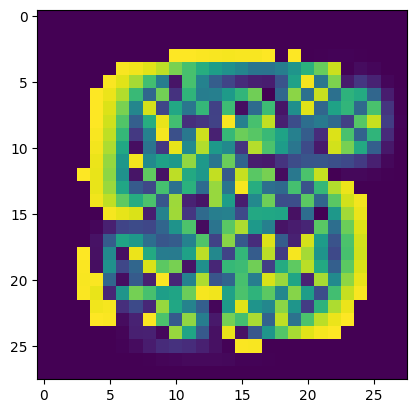

Dimensão 2


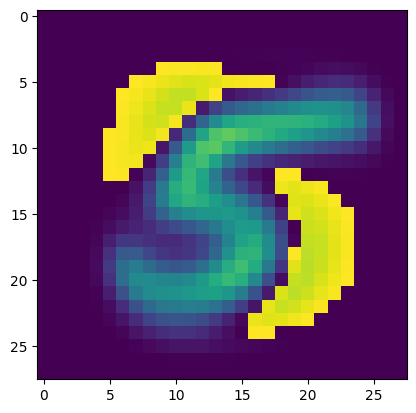

Dimensão 10


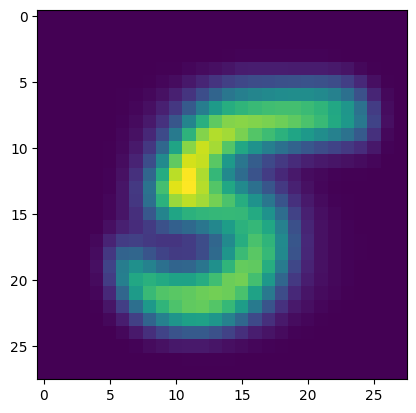

Real


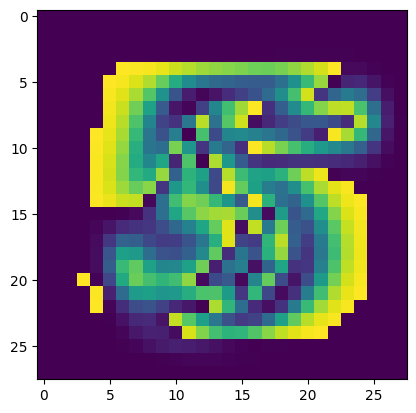

Dimensão 2


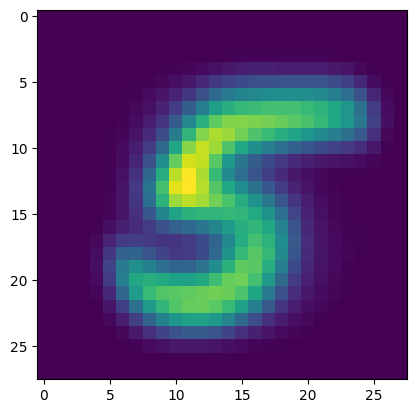

Dimensão 10


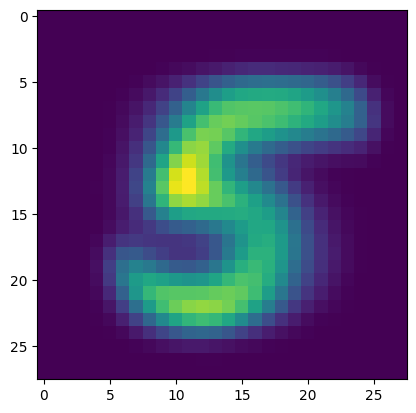

Real


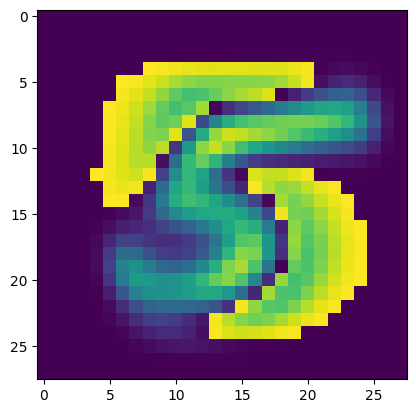

Dimensão 2


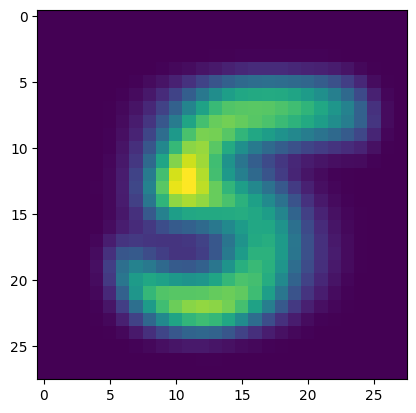

Dimensão 10


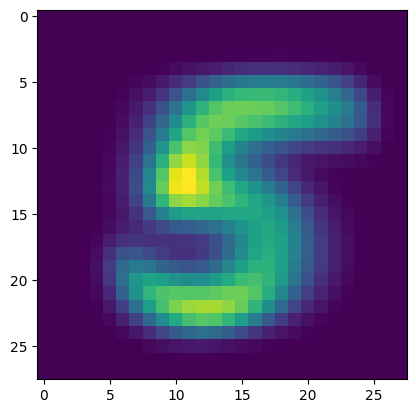

In [40]:
dataset_a = [np.apply_along_axis(lambda x: m_v @ w.T @ (x - media), axis=1, arr=mnist_5_n) for m_v, w, media in zip(m_v_, w_, media_)]
dataset_b = [np.apply_along_axis(lambda y: w @ y + media, axis=1, arr=a) for w, a, media in zip(w_, dataset_a, media_)]

datasets = [dataset_b[0], dataset_b[1], dataset_b[2]]
dimensoes = ["Real", "Dimensão 2", "Dimensão 10", "Dimensão 20"]
possi = [50, 100, 200]

for i in possi:
  for dimensao, dataset in zip(dimensoes, datasets):
    print(dimensao)
    plotar_imagem(dataset[i])

Imagem reconstruída:  2


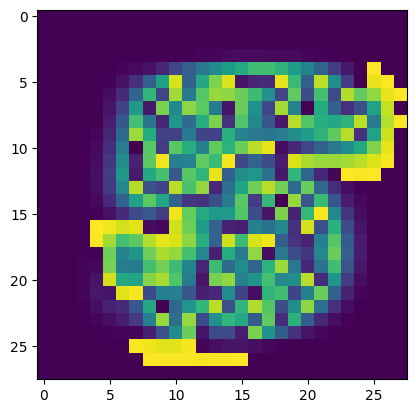

Imagem reconstruída:  10


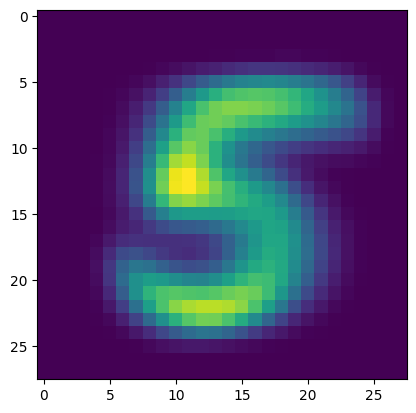

Imagem reconstruída:  20


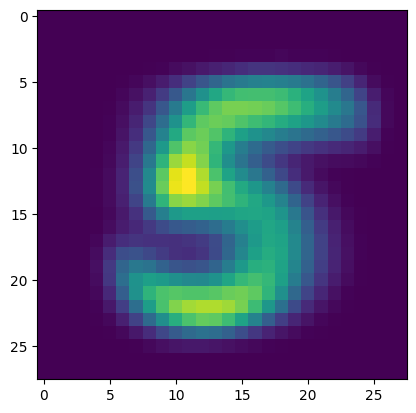

In [41]:
for i in range(3):
  min_vals = np.min(dataset_a[i], axis=0)
  max_vals = np.max(dataset_a[i], axis=0)
  random_vals = np.random.rand(valores[i]) * (max_vals - min_vals)
  amostra = min_vals + random_vals

  reconstruido = np.dot(w_[i], amostra) + media_[i]

  print("Imagem reconstruída: ", valores[i])
  plotar_imagem(reconstruido)

## Questão 2)

In [50]:
gauss = np.genfromtxt("/content/drive/MyDrive/topicos avançados em ML/gaussian_1d.csv")

In [51]:
gauss.shape

(500,)

In [52]:
def inferencia(dataset):
  valor = dataset.shape[0]
  media = np.mean(dataset)

  a = 0.5 * (valor + 1)
  b = 1

  for i in range(10):
    k = a / b
    b = 1 + 0.5 * (1 / k + (media ** 2 + np.sum((dataset - media) ** 2) / k))

  return media, k, a, b

In [53]:
def plot(media, sigma, a, b):
  print("Dados completos")
  print("Média:", media)

  # Distribuição Normal
  normal_dist = stats.norm(loc=media, scale=sigma)
  x_normal = np.linspace(media - 2 * sigma, media + 2 * sigma, 100)
  y_normal = normal_dist.pdf(x_normal)

  # Distribuição T
  t_dist = stats.gamma(a=a, scale=b)
  expectation = t_dist.expect()
  x_t = np.linspace(expectation - (expectation / 2), expectation + (expectation / 2), 1000)
  y_t = t_dist.pdf(x_t)

  plt.figure(figsize=(8, 4))
  plt.subplot(121)
  plt.plot(x_normal, y_normal)
  plt.xlabel("Valores")
  plt.ylabel("Densidade de Probabilidade")
  plt.title("Distribuição Normal")
  plt.subplot(122)
  plt.plot(x_t, y_t)
  plt.xlabel("Valores")
  plt.ylabel("Densidade de Probabilidade")
  plt.title("Distribuição T")
  plt.tight_layout()
  plt.show()

Dados: 10
Dados: 50
Dados: 100
Dados completos
Média: 2.019169009696718


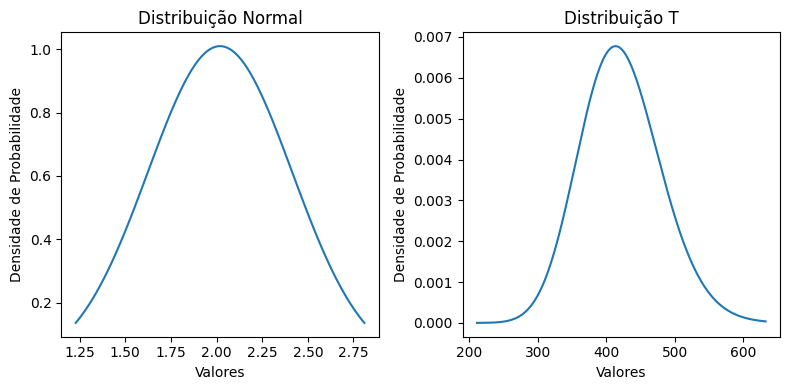

In [54]:
valores = [10, 50, 100, None]

for i in valores:
  if i is not None:
    dataset = gauss[:i]
    sigma = 1 / k
    media, k, a, b = inferencia(dataset)
    print("Dados:", i)
  else:
    plot(media, sigma, a, b)